In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics

In [2]:
df=pd.read_csv('/home/rahul/SpamMessage/spam.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#remove the unnecessary column 'Unnamed:2','Unnamed:3','Unnamed:4'
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']

In [5]:
# now the unnecessary columns have been deleted
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#to check whether any entry is NaN 
df.columns=['label','message']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
#no.of ham and spam messages in dataset
df.groupby('label').count()

,message
label,
ham,4825
spam,747


In [8]:
def preprocessing_of_messages(text):
    text=text.lower()
    text=re.sub("start","",text)
    text=re.sub("voice","",text)
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub('[^a-zA-Z]',' ',text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve'"," have",text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"[-()!*\"#/@;:<>{}""^+=~|.?,]", "", text)
    text = re.sub(" +"," ",text) # for multiple spaces
   
   
    
    emoji = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return emoji.sub(r'', text)
    

In [9]:
index=df.index
for i in range(0,len(index)):
    ans=df.loc[i:i,"message"]
    res=''
    for word in ans:
        res+=preprocessing_of_messages(word)
    df.loc[i:i,"message"]=res

In [10]:
df.loc[:,"message"]

0       go until jurong point crazy available only in ...
1                                ok lar joking wif u oni 
2       free entry in a wkly comp to win fa cup final ...
3            u dun say so early hor u c already then say 
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the nd time we have tried contact u u ...
5568                   will b going to esplanade fr home 
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: message, Length: 5572, dtype: object

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pickle

[nltk_data] Downloading package stopwords to /home/rahul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/rahul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
###Tokenization and Stemming
# There are two types of stemmers in NLTK: Porter Stemmer and Snowball stemmers. 
# We will implement Porter Stemmer here
stemmer=PorterStemmer()
c=[]
for i in range(0,len(df)):
    message =df['message'][i]
    message=nltk.word_tokenize(message)
    message=[stemmer.stem(word) for word in message if not word in stopwords.words('english')]
    message=' '.join(message)
    c.append(message)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(max_features=5000)
X_data=vectorizer.fit_transform(c)
print(vectorizer.get_feature_names())

['aa', 'aah', 'aaooooright', 'aathi', 'abdomen', 'aberdeen', 'abi', 'abil', 'abiola', 'abj', 'abl', 'abouta', 'absenc', 'absolut', 'absolutli', 'abstract', 'abt', 'abta', 'aburo', 'abus', 'ac', 'academ', 'acc', 'accent', 'accept', 'access', 'accid', 'accident', 'accommodationvouch', 'accomod', 'accordingli', 'account', 'ach', 'achan', 'acl', 'aco', 'across', 'act', 'actin', 'action', 'activ', 'actor', 'actual', 'ad', 'adam', 'add', 'addamsfa', 'addi', 'addict', 'address', 'adi', 'adjust', 'admin', 'administr', 'admir', 'admiss', 'admit', 'ador', 'adp', 'adress', 'adrian', 'adsens', 'adult', 'advanc', 'adventur', 'advic', 'advis', 'advisor', 'ae', 'aeronaut', 'aeroplan', 'afew', 'affair', 'affect', 'afghanistan', 'afraid', 'africa', 'african', 'aft', 'afternon', 'afternoon', 'afterward', 'aftr', 'ag', 'agalla', 'age', 'agenc', 'agent', 'ago', 'agre', 'ah', 'aha', 'ahead', 'ahhh', 'ahhhh', 'ahmad', 'ahold', 'aid', 'aight', 'aint', 'air', 'airport', 'airtel', 'aiya', 'aiyah', 'aiyar', 'ai

In [15]:
#saving the model  
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))

In [16]:
#converting the categorical data in the label column to numeri#for each of the 
#for each of the message if it is spam then 1 else 0
Y=np.empty(len(df),dtype=int)
for i in range(0,len(df)):
    if df['label'][i]=='spam':
        Y[i]=1
    else:
        Y[i]=0

In [17]:
#splitting of the dataset into train and test data
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y,test_size=0.2, random_state=0)

np.count_nonzero(Y_train==1)
np.count_nonzero(Y_test==0)
np.count_nonzero(Y_test==1)
print("NonSpam Message in Training Dataset",np.count_nonzero(Y_train==0))
print("Spam Message in Training Dataset",np.count_nonzero(Y_train==1))
print("NonSpam Message in Test Dataset",np.count_nonzero(Y_test==0))
print("Spam Message in Test Dataset",np.count_nonzero(Y_test==1))

NonSpam Message in Training Dataset 3876
Spam Message in Training Dataset 581
NonSpam Message in Test Dataset 949
Spam Message in Test Dataset 166


In [18]:
#using Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
my_model=MultinomialNB()
my_model.fit(X_train,Y_train)

MultinomialNB()

In [19]:
#predict the values for Test DataSet
prediction=my_model.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

array([[935,  14],
       [  9, 157]])

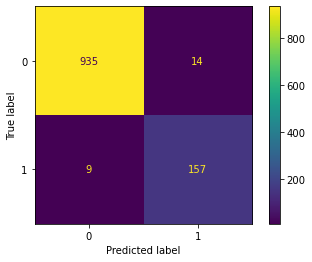

In [20]:
#plotting of the confusion matrix 
matrix = confusion_matrix(Y_test,prediction)
metrics.plot_confusion_matrix(my_model,X_test,Y_test)
matrix

In [21]:
accuracy = accuracy_score(Y_test,prediction)
accuracy*100

97.9372197309417

In [22]:
pickle.dump(my_model,open('my_model.pkl','wb'))